## Q1

In [15]:
%plot inline

In [14]:
c0 = 1.3128;
c1 = 15.7622;
c2 = -4382;
c3 = 1.1455e6;
lam = 425:650;

n_lam = c0 + c1./lam + c2./lam.^2 + c3./lam.^3;

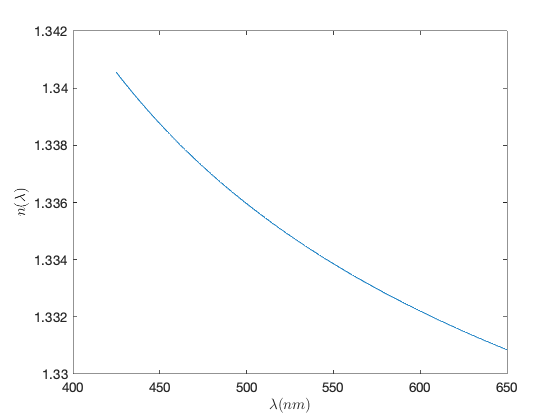

In [20]:
plot(lam, n_lam)
xlabel('$$\lambda (nm)$$', 'interpreter', 'latex')
ylabel('$$n(\lambda)$$', 'interpreter', 'latex')

## Q2

$\theta = \sin^{-1}(\frac{n_1\sin\phi}{n_2})$

## Q3

$\gamma (\phi, \lambda) = 4\theta - 2\phi$

## Q4

In [24]:
n1 = 1;
n2 = n_lam(end)
phi = 30;
theta = asind(n1*sind(phi)/n2)
gamma = 4*theta - 2*phi


n2 =

    1.3308


theta =

   22.0676


gamma =

   28.2703



## Q5

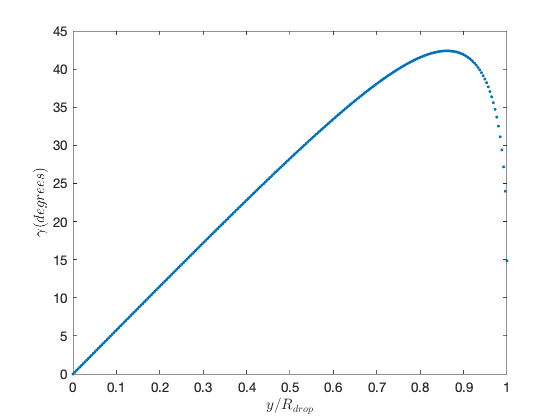

In [32]:
y = linspace(0, 1, 256);
Rdrop = 1;
phi = asind(y/Rdrop);
theta = asind(n1*sind(phi)/n2);
gamma = 4*theta - 2*phi;
plot(y, gamma, '.')
xlabel('$y/R_{drop}$', 'interpreter', 'latex')
ylabel('$\gamma (degrees)$', 'interpreter', 'latex')

## Q6

In [80]:
%%file calculate_deflection.m
function gamma = calculate_delfection(y, lambda, Rdrop)
    n1 = 1;
    c0 = 1.3128;
    c1 = 15.7622;
    c2 = -4382;
    c3 = 1.1455e6;
    n2 = c0 + c1./lambda + c2./lambda.^2 + c3./lambda.^3;
    phi = asind(y/Rdrop);
    theta = asind(n1*sind(phi)./n2);
    gamma = 4*theta - 2*phi;
end

Created file '/Users/rzhu/Documents/PhD/Computational_Lab/Lab3/calculate_deflection.m'.


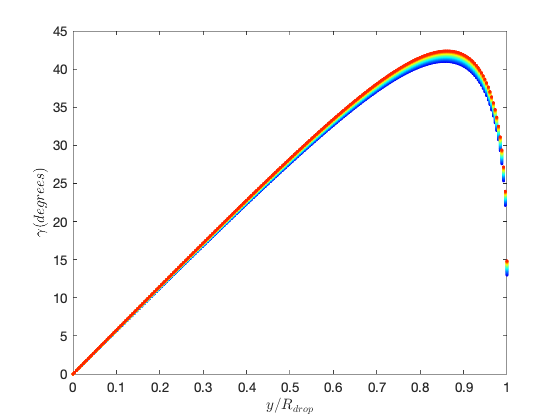

In [55]:
lams = linspace(425, 650, 32);
y = linspace(0, 1, 256);
Rdrop = 1;
for i = 1:length(lams)
    rgb = rainbow_ct(lams(i));
    gamma = calculate_deflection(y, lams(i), Rdrop);
    plot(y/Rdrop, gamma, '.', 'Color', rgb)
    hold on 
end
xlabel('$y/R_{drop}$', 'interpreter', 'latex')
ylabel('$\gamma (degrees)$', 'interpreter', 'latex')

## Q7

There are two effects evident in Figure 1.2. Firstly, rays with a large angle of incidence tend to experience the largest deflection. This can be inferred from γ vs y/Rdrop plot which obtains a maximum around φ ≈ 60◦ (correponding to γ ≈ 43◦). Secondly, for a given φ, red rays are deflected more than blue. This can be seen in the γ vs y/Rdrop plot as the red curve sits above the blue.

## Q8

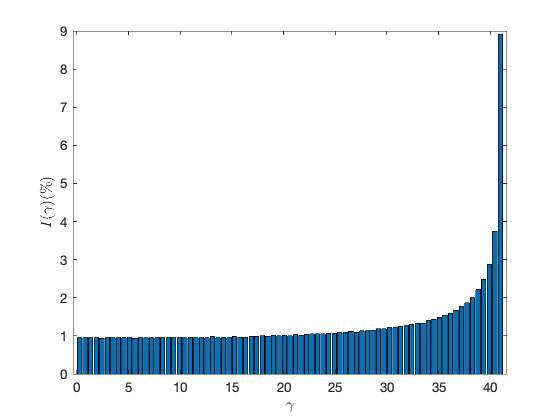

In [68]:
y = linspace(0, 1, 6000);
Rdrop = 1;
gamma = calculate_deflection(y, 450, Rdrop);

[counts bin_loc] = hist(gamma, sqrt(length(gamma)));
bar(bin_loc, counts/6000*100);
xlabel('$\gamma$', 'interpreter', 'latex')
ylabel('$I(\gamma) (\%)$', 'interpreter', 'latex')

## Q9

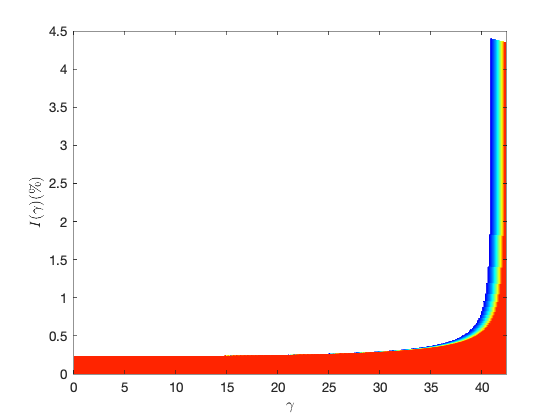

In [71]:
lams = linspace(425, 650, 32);
y = linspace(0, 1, 10^5);
Rdrop = 1;
for i = 1:length(lams)
    rgb = rainbow_ct(lams(i));
    gamma = calculate_deflection(y, lams(i), Rdrop);
    [counts bin_loc] = hist(gamma, sqrt(length(gamma)));
    bar(bin_loc, counts/10^5*100, 'FaceColor', rgb, 'EdgeColor', rgb);
    hold on 
end
xlabel('$\gamma$', 'interpreter', 'latex')
ylabel('$I(\gamma) (\%)$', 'interpreter', 'latex')

## Q10

Each wavelength obtains an intensity maximum at a different value of γ. This results in the formation of the distinct bands of colour characteristic of rainbows. The bow is ≈ 1.8◦ in size.

## Q12

$\gamma = 180 + 2\phi - 6\theta$

## Q13

In [83]:
%%file double_deflection.m
function gamma = double_deflection(y, lambda, Rdrop)
    n1 = 1;
    c0 = 1.3128;
    c1 = 15.7622;
    c2 = -4382;
    c3 = 1.1455e6;
    n2 = c0 + c1./lambda + c2./lambda.^2 + c3./lambda.^3;
    phi = asind(y/Rdrop);
    theta = asind(n1*sind(phi)./n2);
    gamma = 180 + 2*phi - 6*theta;
end

Created file '/Users/rzhu/Documents/PhD/Computational_Lab/Lab3/double_deflection.m'.


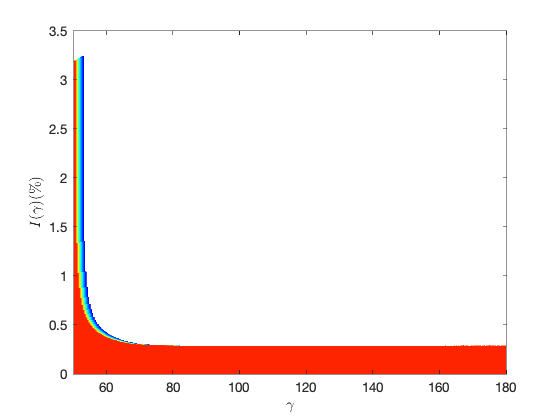

In [3]:
Rdrop = 1;
lams = linspace(425, 650, 32);
y = linspace(0, Rdrop, 10^5);

for i = 1:length(lams)
    rgb = rainbow_ct(lams(i));
    gamma = double_deflection(y, lams(i), Rdrop);
    [counts bin_loc] = hist(gamma, sqrt(length(gamma)));
    bar(bin_loc, counts/10^5*100, 'FaceColor', rgb, 'EdgeColor', rgb);
    hold on 
end
xlabel('$\gamma$', 'interpreter', 'latex')
ylabel('$I(\gamma) (\%)$', 'interpreter', 'latex')

## Q14

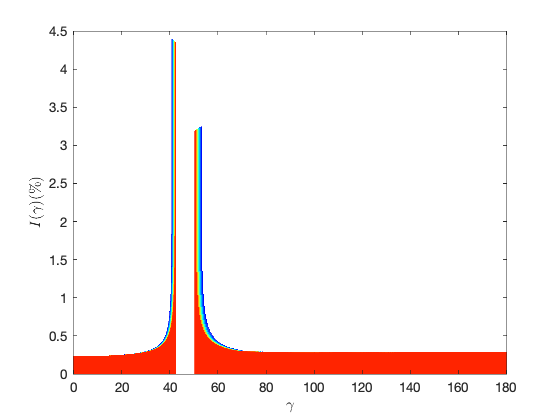

In [89]:
Rdrop = 1;
lams = linspace(425, 650, 32);
y = linspace(0, Rdrop, 10^5);

for i = 1:length(lams)
    rgb = rainbow_ct(lams(i));
    gamma = calculate_deflection(y, lams(i), Rdrop);
    gamma2 = double_deflection(y, lams(i), Rdrop);
    [counts bin_loc] = hist(gamma, sqrt(length(gamma)));
    bar(bin_loc, counts/10^5*100, 'FaceColor', rgb, 'EdgeColor', rgb);
    hold on 
    [counts bin_loc] = hist(gamma2, sqrt(length(gamma2)));
    bar(bin_loc, counts/10^5*100, 'FaceColor', rgb, 'EdgeColor', rgb);
    hold on
end
xlabel('$\gamma$', 'interpreter', 'latex')
ylabel('$I(\gamma) (\%)$', 'interpreter', 'latex')